In [1]:
#https://www.kaggle.com/code/sakshaymahna/yolov3-keras-2d-object-detection/notebook
#https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/

In [2]:
import struct
import cv2
import os
import argparse
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os 
os.listdir('/content/gdrive/My Drive/noor')

['train', 'test_images.zip', 'train_images.zip', 'train.zip', 'model.h5']

In [5]:
os.chdir('/content/gdrive/My Drive/noor')
os.getcwd()

'/content/gdrive/.shortcut-targets-by-id/1E3BYDYLyypIAHCVMXkxmQo9HLF_zznDw/noor'

In [6]:
!ls -lh '/content/gdrive/drive/My Drive/'

ls: cannot access '/content/gdrive/drive/My Drive/': No such file or directory


In [7]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/15768/700263/upload/test_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1659118298&Signature=juu1QcfYRKsYkHfD8lzdwULfSKTgXTTn4Un%2FNm60RX3IPtrE4G8niFzpGtGy0CvecVniCISycGmbTBQFxcfLlq8JPQQQwBMTflU9g3Ad8sbRmbmUQckWunfYz4IqCwAzR5wXmZTsXPZ6tz3HL7ewISby8oalSCDCRihoboo6UyawZzPIMxSE5TfCB63OKIai9Pw%2Bx8bYnOM4wx2BEDIO%2BsL6uCPf3u1%2BIbWCu2fBAk9VPtk3lEfphpxpUv%2BkII%2FZ1J5yI9SezhRfYQxu7I1mgeo77lUDQiF%2FVdc67ColmcSMYi8rU2C6AJee%2BWLvcMXx7fy98WrQvRtl0FxBJ%2FaWnw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_images.zip' \
-O 'test_images.zip'

--2022-08-17 11:16:01--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/15768/700263/upload/test_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1659118298&Signature=juu1QcfYRKsYkHfD8lzdwULfSKTgXTTn4Un%2FNm60RX3IPtrE4G8niFzpGtGy0CvecVniCISycGmbTBQFxcfLlq8JPQQQwBMTflU9g3Ad8sbRmbmUQckWunfYz4IqCwAzR5wXmZTsXPZ6tz3HL7ewISby8oalSCDCRihoboo6UyawZzPIMxSE5TfCB63OKIai9Pw%2Bx8bYnOM4wx2BEDIO%2BsL6uCPf3u1%2BIbWCu2fBAk9VPtk3lEfphpxpUv%2BkII%2FZ1J5yI9SezhRfYQxu7I1mgeo77lUDQiF%2FVdc67ColmcSMYi8rU2C6AJee%2BWLvcMXx7fy98WrQvRtl0FxBJ%2FaWnw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 142.251.163.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2022-08-17 11:16:01 ERROR 400: Bad Request.



In [8]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/15768/700263/upload/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1659118313&Signature=gVvLohwyw%2FCQguI779jgXYnhsOCJiu%2BcFD8USxAqnMFfIXvbR8I2Teiqo6r47aqU4dc3prg44icsWL8dgM4GbCT4vXhBhHjwR7vflyrKoykKkY3ZltMy0NqXH%2BX0w9LImNR3ncRM9KretGqbtIPMNQUXm6FTSySMud9uoNK29Odk7jIoE2AmhjBvG%2BoBHbkZI0Q8pZ%2Fj5WOTehSP%2Bshm83POMUKWTIwmMHYjPeex6%2By%2B5lcWKl4fXsMi1LrXB6KZ3Ce%2Fygo86T3GpijbP22UApJgDkKA4DBy896iZoUiKzKjot50K5mT5xJYpNRKWSjsEkpJAktj6wRG3WGQ4eh4JQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip' \
-O 'train_images.zip'

--2022-08-17 11:16:01--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/15768/700263/upload/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1659118313&Signature=gVvLohwyw%2FCQguI779jgXYnhsOCJiu%2BcFD8USxAqnMFfIXvbR8I2Teiqo6r47aqU4dc3prg44icsWL8dgM4GbCT4vXhBhHjwR7vflyrKoykKkY3ZltMy0NqXH%2BX0w9LImNR3ncRM9KretGqbtIPMNQUXm6FTSySMud9uoNK29Odk7jIoE2AmhjBvG%2BoBHbkZI0Q8pZ%2Fj5WOTehSP%2Bshm83POMUKWTIwmMHYjPeex6%2By%2B5lcWKl4fXsMi1LrXB6KZ3Ce%2Fygo86T3GpijbP22UApJgDkKA4DBy896iZoUiKzKjot50K5mT5xJYpNRKWSjsEkpJAktj6wRG3WGQ4eh4JQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 142.251.163.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2022-08-17 11:16:01 ERROR 400: Bad Request.



In [9]:
limit = 1000

train_file_path = 'train_images.zip'
train_destination = 'train'

!unzip -Z1 $train_file_path \
| head -$limit \
| sed 's| |\\ |g' \
| xargs unzip -n $train_file_path -d $train_destination

test_file_path = 'test_images.zip'
test_destination = 'test'

!unzip -Z1 $test_file_path \
| head -$limit \
| sed 's| |\\ |g' \
| xargs unzip -n $test_file_path -d $test_destination


[train_images.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
zipinfo:  cannot find zipfile directory in one of train_images.zip or
          train_images.zip.zip, and cannot find train_images.zip.ZIP, period.
Archive:  train_images.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train_images.zip or
        train_images.zip.zip, and cannot find train_images.zip.ZIP, period.
[test_images.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archi

In [10]:
limit = 1000

train_file_path = 'train_images.zip'
train_destination = 'train'

!unzip -Z1 $train_file_path \
| head -$limit \
| sed 's| |\\ |g' \
| xargs unzip -n $train_file_path -d $train_destination

[train_images.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
zipinfo:  cannot find zipfile directory in one of train_images.zip or
          train_images.zip.zip, and cannot find train_images.zip.ZIP, period.
Archive:  train_images.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train_images.zip or
        train_images.zip.zip, and cannot find train_images.zip.ZIP, period.


In [11]:

print(os.listdir(os.getcwd()))
print(f'We have {len(os.listdir(os.path.join(os.getcwd(), "train")))} train images')

['train', 'test_images.zip', 'train_images.zip', 'train.zip', 'model.h5']
We have 1000 train images


You can re-Zip the extracted part of the data, and store it in drive

In [12]:
!zip -r train.zip ./train
!zip -r test.zip ./test

updating: train/ (stored 0%)
updating: train/host-a004_cam0_1232817658451064006.jpeg (deflated 1%)
updating: train/host-a004_cam0_1232825408851064006.jpeg (deflated 5%)
updating: train/host-a004_cam0_1232833325251064006.jpeg (deflated 4%)
updating: train/host-a004_cam0_1232817665651064006.jpeg (deflated 9%)
updating: train/host-a004_cam0_1232817668251064006.jpeg (deflated 7%)
updating: train/host-a004_cam0_1232838157251064006.jpeg (deflated 5%)
updating: train/host-a004_cam0_1232842369851064006.jpeg (deflated 3%)
updating: train/host-a004_cam0_1232838153851064006.jpeg (deflated 7%)
updating: train/host-a004_cam0_1232905133951064006.jpeg (deflated 7%)
updating: train/host-a004_cam0_1232905120151064006.jpeg (deflated 8%)
updating: train/host-a004_cam0_1232905220351064006.jpeg (deflated 5%)
updating: train/host-a004_cam0_1232987676151064006.jpeg (deflated 5%)
updating: train/host-a004_cam0_1232987661751064006.jpeg (deflated 8%)
updating: train/host-a004_cam0_1232923281451064006.jpeg (defl

In [13]:
DATA_PATH = ''

In [14]:
# create a YOLOv3 Keras model and save it to file
# based on https://github.com/experiencor/keras-yolo3

def _conv_block(inp, convs, skip=True):
    x = inp
    count = 0
    
    for conv in convs:
        if count == (len(convs) - 2) and skip:
            skip_connection = x
        count += 1
        
        if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
        x = Conv2D(conv['filter'], 
                   conv['kernel'], 
                   strides=conv['stride'], 
                   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
                   name='conv_' + str(conv['layer_idx']), 
                   use_bias=False if conv['bnorm'] else True)(x)
        if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
        if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    return add([skip_connection, x]) if skip else x


In [15]:
def make_yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
        
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
        
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    model = Model(input_image, [yolo_82, yolo_94, yolo_106])    
    return model


In [16]:
class WeightReader:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as w_f:
            major,    = struct.unpack('i', w_f.read(4))
            minor,    = struct.unpack('i', w_f.read(4))
            revision, = struct.unpack('i', w_f.read(4))

            if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)
            else:
                w_f.read(4)

            transpose = (major > 1000) or (minor > 1000)
            
            binary = w_f.read()

        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')
        
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, model):
        for i in range(106):
            try:
                conv_layer = model.get_layer('conv_' + str(i))
                print("loading weights of convolution #" + str(i))

                if i not in [81, 93, 105]:
                    norm_layer = model.get_layer('bnorm_' + str(i))

                    size = np.prod(norm_layer.get_weights()[0].shape)

                    beta  = self.read_bytes(size) # bias
                    gamma = self.read_bytes(size) # scale
                    mean  = self.read_bytes(size) # mean
                    var   = self.read_bytes(size) # variance            

                    weights = norm_layer.set_weights([gamma, beta, mean, var])  

                if len(conv_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                print("no convolution #" + str(i))     
    
    def reset(self):
        self.offset = 0


In [17]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle

label_map = {
    "person": "blue",
    "bicycle": "yellow", 
    "car": "red",
    "truck": "green",
    "motorbike": "white", 
    "aeroplane": "white", 
    "bus": "white",
    "train": "white", 
    "boat": "white"
}
 

In [18]:
class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
        self.objness = objness
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
            
        return self.score

In [19]:
def _sigmoid(x):
    return 1. / (1. + np.exp(-x))


In [20]:
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5
    boxes = []
    netout[..., :2]  = _sigmoid(netout[..., :2])
    netout[..., 4:]  = _sigmoid(netout[..., 4:])
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
    netout[..., 5:] *= netout[..., 5:] > obj_thresh
 
    for i in range(grid_h*grid_w):
        row = i / grid_w
        col = i % grid_w
        for b in range(nb_box):
            # 4th element is objectness score
            objectness = netout[int(row)][int(col)][b][4]
            if(objectness.all() <= obj_thresh): continue
            # first 4 elements are x, y, w, and h
            x, y, w, h = netout[int(row)][int(col)][b][:4]
            x = (col + x) / grid_w # center position, unit: image width
            y = (row + y) / grid_h # center position, unit: image height
            w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
            h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
            # last elements are class probabilities
            classes = netout[int(row)][col][b][5:]
            box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
            boxes.append(box)
    return boxes

In [21]:
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    if (float(net_w)/image_w) < (float(net_h)/image_h):
        new_w = net_w
        new_h = (image_h*net_w)/image_w
    else:
        new_h = net_w
        new_w = (image_w*net_h)/image_h
        
    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
        
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)
        

In [22]:
def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b

    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3          


In [23]:
def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
    
    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
    
    union = w1*h1 + w2*h2 - intersect
    
    return float(intersect) / union


In [24]:
def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return
        
    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]

            if boxes[index_i].classes[c] == 0: continue

            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]

                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0
                    

In [25]:
# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height
 

In [26]:
def preprocess_input(image, net_h, net_w):
    new_h, new_w, _ = image.shape

    # determine the new size of the image
    if (float(net_w)/new_w) < (float(net_h)/new_h):
        new_h = (new_h * net_w)/new_w
        new_w = net_w
    else:
        new_w = (new_w * net_h)/new_h
        new_h = net_h

    # resize the image to the new size
    resized = cv2.resize(image[:,:,::-1]/255., (int(new_w), int(new_h)))

    # embed the image into the standard letter box
    new_image = np.ones((net_h, net_w, 3)) * 0.5
    new_image[int((net_h-new_h)//2):int((net_h+new_h)//2), int((net_w-new_w)//2):int((net_w+new_w)//2), :] = resized
    new_image = np.expand_dims(new_image, 0)

    return new_image


In [27]:
def get_boxes(boxes, labels, thresh):
  v_boxes, v_labels, v_scores = list(), list(), list()
  # enumerate all boxes
  for box in boxes:
    # enumerate all possible labels
    for i in range(len(labels)):
      # check if the threshold for this label is high enough
      if box.classes[i] > thresh:
        v_boxes.append(box)
        v_labels.append(labels[i])
        v_scores.append(box.classes[i]*100)
        # don't break, many labels may trigger for one box
  return v_boxes, v_labels, v_scores

In [28]:
def draw_boxes(filename, v_boxes, v_labels, v_scores):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for i in range(len(v_boxes)):
        box = v_boxes[i]
        # get coordinates
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color=label_map[v_labels[i]])
        # draw the box
        ax.add_patch(rect)
        # draw text and score in top left corner
        label = "%s (%.3f)" % (v_labels[i], v_scores[i])
        pyplot.text(x1, y1, label, color=label_map[v_labels[i]])
    # show the plot
    pyplot.show()

In [29]:
# define the model
model = make_yolov3_model()

# load the model weights
# I have loaded the pretrained weights in a separate dataset
weight_reader = WeightReader('/content/gdrive/MyDrive/yolov3.weights/yolov3.weights')

# set the model weights into the model
weight_reader.load_weights(model)

# save the model to file
model.save('model.h5')

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

loading weights of convolution #88
loading weights of convolution #89
loading weights of convolution #90
loading weights of convolution #91
loading weights of convolution #92
loading weights of convolution #93
no convolution #94
no convolution #95
loading weights of convolution #96
no convolution #97
no convolution #98
loading weights of convolution #99
loading weights of convolution #100
loading weights of convolution #101
loading weights of convolution #102
loading weights of convolution #103
loading weights of convolution #104
loading weights of convolution #105


In [30]:
# load yolov3 model
from keras.models import load_model
model = load_model('model.h5')

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv_0 (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bnorm_0 (BatchNormalization)   (None, None, None,   128         ['conv_0[0][0]']                 
                                32)                                                           

In [32]:
# Parameters used in the Dataset, on which YOLOv3 was pretrained
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# define the expected input shape for the model
WIDTH, HEIGHT = 416, 416

# define the probability threshold for detected objects
class_threshold = 0.3

In [33]:
import os
from matplotlib import pyplot as plt
images = os.listdir('train')[10:50]

images

['host-a004_cam0_1232905220351064006.jpeg',
 'host-a004_cam0_1232987676151064006.jpeg',
 'host-a004_cam0_1232987661751064006.jpeg',
 'host-a004_cam0_1232923281451064006.jpeg',
 'host-a004_cam0_1233014363651064006.jpeg',
 'host-a004_cam0_1233014357651064006.jpeg',
 'host-a004_cam0_1233014844651064006.jpeg',
 'host-a004_cam0_1233014865451064006.jpeg',
 'host-a004_cam0_1233080762151064006.jpeg',
 'host-a004_cam0_1233422543851064006.jpeg',
 'host-a004_cam0_1233444817951064006.jpeg',
 'host-a004_cam0_1233442991951064006.jpeg',
 'host-a004_cam0_1233535968751064006.jpeg',
 'host-a004_cam0_1233444824351064006.jpeg',
 'host-a004_cam0_1233617936351064006.jpeg',
 'host-a004_cam0_1233683001051064006.jpeg',
 'host-a004_cam0_1233618023551064006.jpeg',
 'host-a004_cam0_1233617953151064006.jpeg',
 'host-a004_cam0_1233683005251064006.jpeg',
 'host-a004_cam0_1233683004451064006.jpeg',
 'host-a004_cam0_1233693215951064006.jpeg',
 'host-a004_cam0_1233693208751064006.jpeg',
 'host-a004_cam0_123394711255106

In [34]:
from numpy import expand_dims
from keras.preprocessing.image import load_img, img_to_array

# load and prepare an image
def load_image_pixels(filename, shape):
    '''
    Function preprocess the images to 416x416, which is the standard input shape for YOLOv3, 
    and also keeps track of the originl shape, which is later used to draw the boxes.
    
    paramters:
    filename {String}: path to the image
    shape {tuple}: shape of the input dimensions of the network
    
    returns:
    image {PIL}: image of shape 'shape'
    width {int}: original width of the picture
    height {int}: original height of the picture
    '''
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    
    # convert to numpy array
    image = img_to_array(image)
    
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height

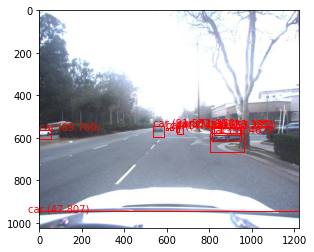

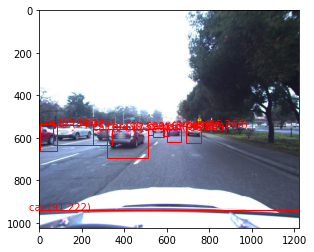

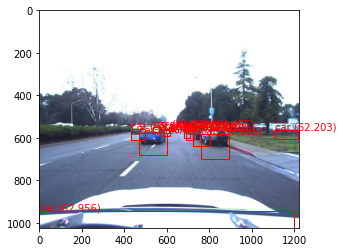

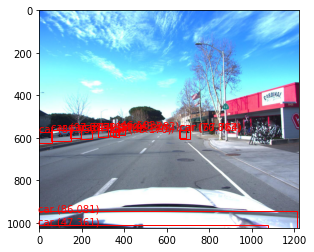

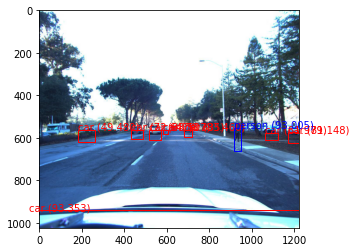

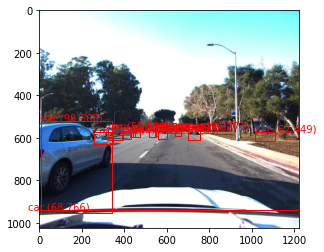

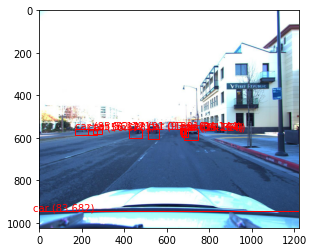

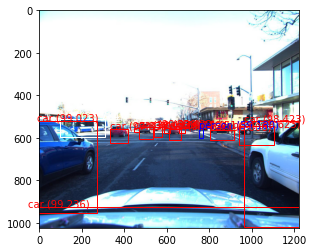

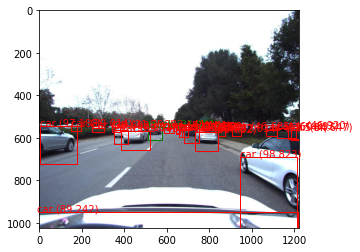

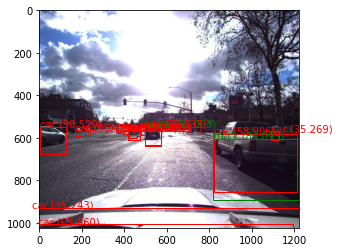

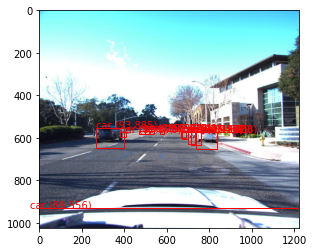

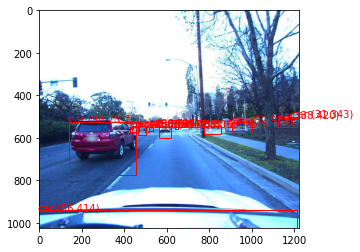

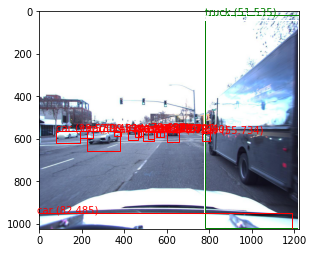

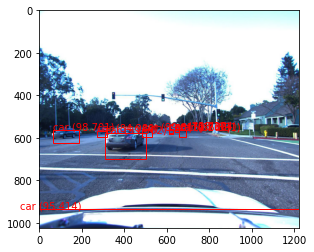

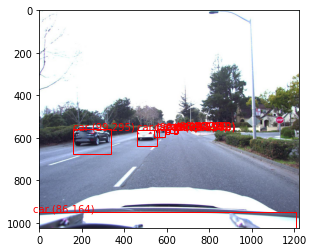

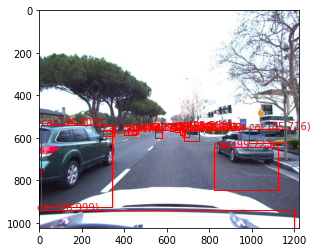

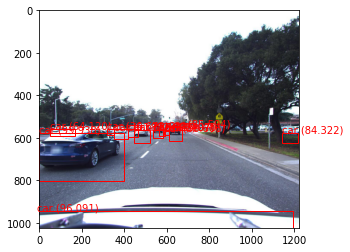

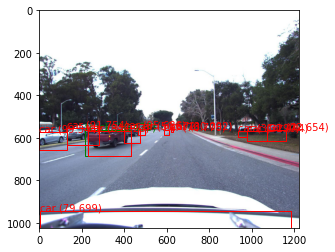

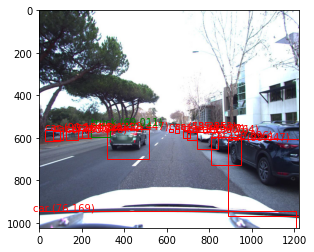

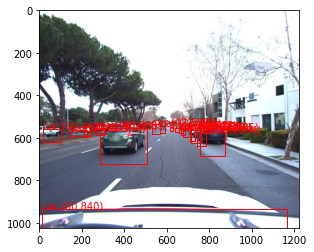

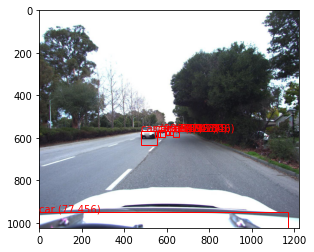

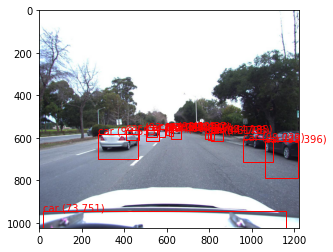

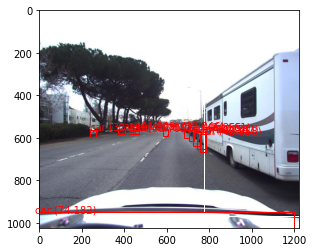

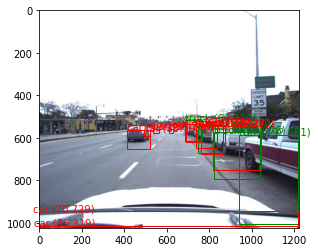

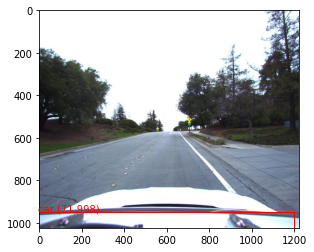

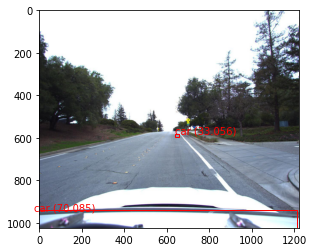

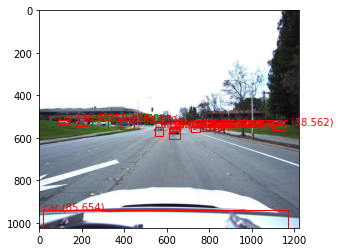

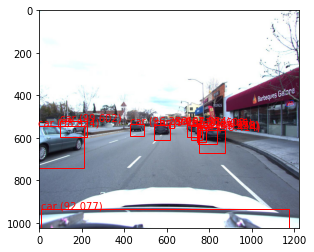

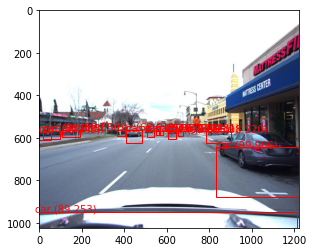

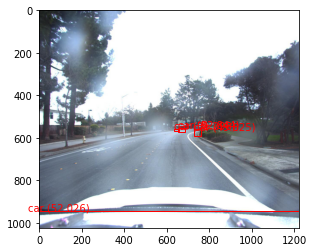

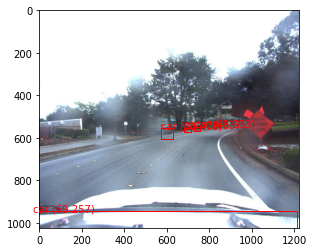

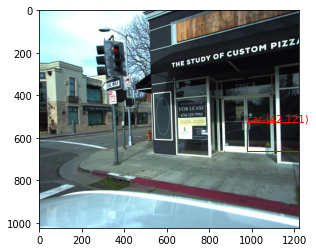

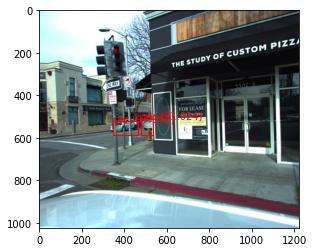

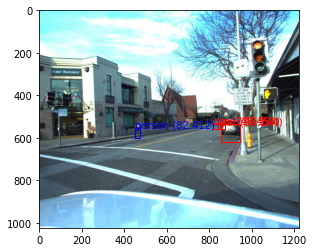

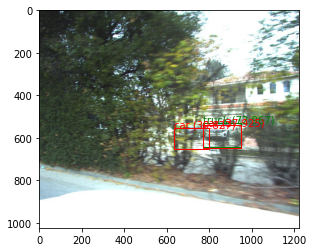

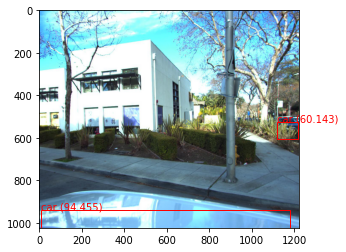

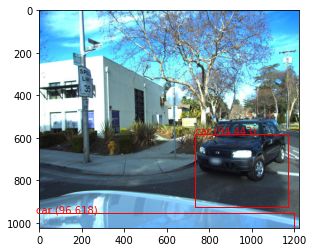

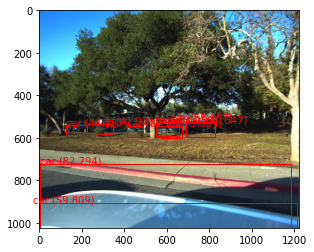

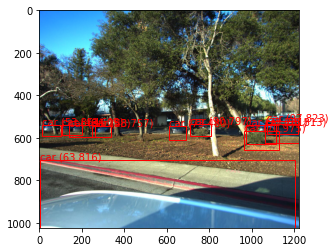

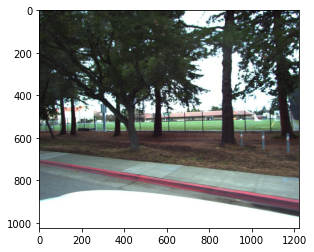

In [39]:
for file in images:
    photo_filename = 'train/' + file
    
    # load picture with old dimensions
    image, image_w, image_h = load_image_pixels(photo_filename, (WIDTH, HEIGHT))
    
    
    # Predict image
    yhat = model.predict(image)
    
    # Create boxes
    boxes = list()
    real_boxes = list()
    for i in range(len(yhat)):
        # decode the output of the network
        boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, HEIGHT, WIDTH)
        real_boxes.append(anchors[i])

    # correct the sizes of the bounding boxes for the shape of the image
    correct_yolo_boxes(boxes, image_h, image_w, HEIGHT, WIDTH)

    # suppress non-maximal boxes
    do_nms(boxes, 0.5)

    # define the labels (Filtered only the ones relevant for this task, which were used in pretraining the YOLOv3 model)
    labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck","boat"]

    # get the details of the detected objects
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

    # draw what we found
    draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

    pred_boxes = list()

    pred_boxes = v_boxes


In [ ]:
iou = np.mean(bbox_iou(real_boxes, pred_boxes))
print("iou is " ,iou) #iou is 0.7980